<a href="https://colab.research.google.com/github/dulce-bits/dataset_RP_U1/blob/master/UNIT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ATTRIBUTES OF THE PERFORMANCE OF CENTRAL PROCESSING UNITS: A RELATIVE PERFORMANCE PREDICTION MODEL

La presente práctica utiliza el conjunto de datos Computer Hardware Dataset disponible en el Repositorio de Machine Learning de la UCI (https://archive.ics.uci.edu/ml/datasets/Computer+Hardware). Se pretende que a través de la implementación de el lenguaje Python se utilicen las técnicas de regresión lineal y regresión KNN para encontrar el modelo que se adapte de manera adecuada a los datos del conjunto dado, así como comparar los resultados y concluir cual de los dos modelos se adapta mejor a este conjunto de datos en especifico.

Dulce Celeste Cruz Ramirez

8vo Semestre ITCG

Reconocimiento de patrones

# Regresión lineal múltiple
Se importan las librerias necesarias
Se lee el archivo de datos desde un repositorio en github, se calculan los valores MAVG, CHCAP y SQRPERF que son necesarios para implementar el modelo, y por ultimo se guardan en un nuevo archivo llamado machine_edited.csv por cuestiones prácticas ya que se utilizará el mismo archivo para la regresión KNN.

In [0]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split

url='https://raw.githubusercontent.com/dulce-bits/dataset_RP_U1/master/machine.csv'

df=pd.read_csv(url)

def MAVG(df):
    mv_lis=[]
    for i in range(df.shape[0]):
        row = df.iloc[i]
        mv_lis.append((row.MMIN+row.MMAX)/2*pow(10,-3))
    MAVG=pd.Series(mv_lis)
    df=df.assign(MAVG=MAVG.values)
    return df

def CHCAP(df):
    ch_lis=[]
    for i in range(df.shape[0]):
        row = df.iloc[i]
        chavg = math.floor(((row.CHMIN+row.CHMAX)/2)+1)
        speed = 1/row.MCYT
        ch_lis.append(chavg*speed+10)
    CHCAP=pd.Series(ch_lis)
    df=df.assign(CHCAP=CHCAP.values)
    return df

def SQR(df):
    sqr_lis=[]
    for i in range(df.shape[0]):
        row = df.iloc[i]
        sqr = math.sqrt(row.ERP)
        sqr_lis.append(sqr)
    SQRPERF=pd.Series(sqr_lis)
    df=df.assign(SQRPERF=SQRPERF.values)
    return df

df=MAVG(df)
df=CHCAP(df)
df=SQR(df)

df.to_csv('machine_edited.csv',index=False)


Se separa el dataframe en dos conjuntos; uno de entrenamiento(train) y otro de pruebas(test).
Se genera al modelo lineal SQRPERF con base en el artículo de Ein-Dor y Feldmesser (1987) utilizando la libreria statsmodels y el conjunto de entrenamiento. 

$\ SQRPERF = A_{0} + A_{1}(MAVG) + A_{2}(CACH)+A_{3}(CHCAP) $

Que equivale al modelo lineal:

$\ Y = B_{0} + B_{1}(X_{1}) + B_{2}(X_{2})+B_{3}(X_{3}) $



In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

url='https://raw.githubusercontent.com/dulce-bits/dataset_RP_U1/master/machine_edited.csv'

df=pd.read_csv(url)

train,test=train_test_split(df,test_size=0.5,train_size=0.5)

import statsmodels.formula.api as smfrmla
model = smfrmla.ols("SQRPERF ~ MAVG + CACH + CHCAP",train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                SQRPERF   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.926e+06
Date:                Mon, 20 May 2019   Prob (F-statistic):          6.47e-238
Time:                        04:18:04   Log-Likelihood:                 242.69
No. Observations:                 104   AIC:                            -477.4
Df Residuals:                     100   BIC:                            -466.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2639      0.077   -197.371      0.0

Como resultado podemos ver el summary del modelo de regresión lineal múltiple que acabamos de crear, a continuación describo la interpretación de los puntos más relevantes de éste:


1.   En la columna de coeficiente podemos ver los valores estimados para $\ B_{0} , B_{1}, B_{2} $ y $\ B_{3}$ en orden descendente respectivamente, de acuerdo al articulo de Eindor y Feldmesser (1987) los valores de estos deberían ser 3.78, 0.49, 0.3 y 0.19 respectivamente. Se puede observar que para $ \ B_{0}$ y $ \ B_{1}$ los valores estimados entran en el rango estimado por el modelo, mientras que los demás no entran en el rango estimado.
2.   De acuerdo al resutado de la F-statistic para probar $\ H_{0} $vs $\ H_{a} $. Cuando no hay relación entre la respuesta y los predictores se espera que el valor de el F-statistic tome un valor cercano a 1, por otro lado, cuando $ \ H_{a}$ se espera que su valor sea mayor a 1. En este caso se puede apreciar que el F-statistic toma un valor de 1132000 aproximado, con el cual se puede descartar $\ H_{0}$ y sugiere que al menos uno de los predictores es relevante para estimar SQRPERF
3. De acuerdo al rango estimado y con un 95% de intervalo de confianza, el error estándar estimado tiene un valor bajo en todos los coeficientes, por lo que esto brinda fuerte evidencia para descartar $\ H_{0}$.
4. La prueba t mide el número de desviaciones estándar del que los coeficientes $\ B_{1}, B_{2} $ y $\ B_{3}$ son distantes de 0, si realmente no hay relación entre X (MAVG, CACH y CHCAP) y Y (SQRPERF) entonces se esperaria que la prueba t tuviera una distribucion-t con n-2 grados de libertad. Dado que los coeficientes son bastante grandes comparados con sus errores estandar, entonces las pruebas t son tambien grandes, por lo que las probabilidades de ver tales valores si $\ H_{0}$ es verdadera son cero, por lo que se puede concluir que $\ B_{1} \neq 0$, $\ B_{2} \neq 0$ y $\ B_{3} \neq 0$.



A continuación esta el código para graficar los resultados obtenidos respecto al conjunto de entrenamiento, los puntos rojos son las instancias originales SQRPERF y la linea azul es el obtenido por el modelo de regresión lineal múltiple.

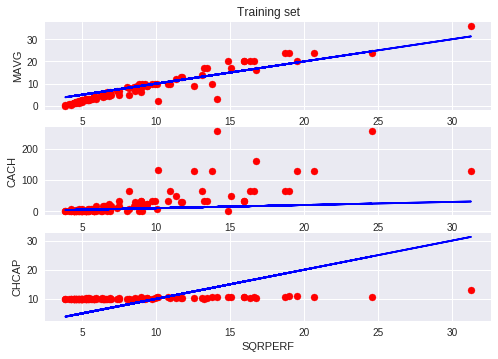

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

url='https://raw.githubusercontent.com/dulce-bits/dataset_RP_U1/master/machine_edited.csv'

df=pd.read_csv(url)

train,test=train_test_split(df,test_size=0.5,train_size=0.5)

import statsmodels.formula.api as smfrmla
model = smfrmla.ols("SQRPERF ~ MAVG + CACH + CHCAP",train).fit()

x_train = train[['MAVG','CACH','CHCAP']]
y_train = train['SQRPERF']
f_train = model.predict(x_train)

import matplotlib.pyplot as plt
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.subplot(3,1,1)
plt.scatter(y_train,x_train[['MAVG']], color='r')
plt.plot(y_train, f_train, color='b')
plt.title('Training set')
plt.ylabel('MAVG')

plt.subplot(3,1,2)
plt.scatter(y_train,x_train[['CACH']], color='r')
plt.plot(y_train, f_train, color='b')
plt.ylabel('CACH')
plt.xlabel('SQRPERF')

plt.subplot(3,1,3)
plt.scatter(y_train,x_train[['CHCAP']], color='r')
plt.plot(y_train, f_train, color='b')
plt.ylabel('CHCAP')
plt.xlabel('SQRPERF')

plt.show()

A continuación esta el código para graficar los resultados obtenidos respecto al conjunto de pruebas, los puntos rojos son las instancias originales SQRPERF y la linea azul es el obtenido por el modelo de regresión lineal múltiple.

Test set results
> predicted= 24.545122008782588, actual= 24.556058315617353
> predicted= 6.485604820755928, actual= 6.4807406984078595
> predicted= 5.110820869390652, actual= 5.0990195135927845
> predicted= 6.8369920591860005, actual= 6.855654600401044
> predicted= 13.224872803821585, actual= 13.228756555322953
> predicted= 5.462964736197494, actual= 5.47722557505166
> predicted= 13.455893264793035, actual= 13.45362404707371
> predicted= 8.069486024156284, actual= 8.06225774829855
> predicted= 5.3253110142622155, actual= 5.291502622129181
> predicted= 4.782423033474593, actual= 4.795831523312719
> predicted= 4.337519172010467, actual= 4.358898943540674
> predicted= 5.810402699689153, actual= 5.830951894845301
> predicted= 15.916277970306238, actual= 15.905973720586864
> predicted= 8.352238861037614, actual= 8.366600265340756
> predicted= 4.855260673590532, actual= 4.898979485566356
> predicted= 5.402540190042945, actual= 5.385164807134505
> predicted= 5.6454526126658156, actual= 5.656

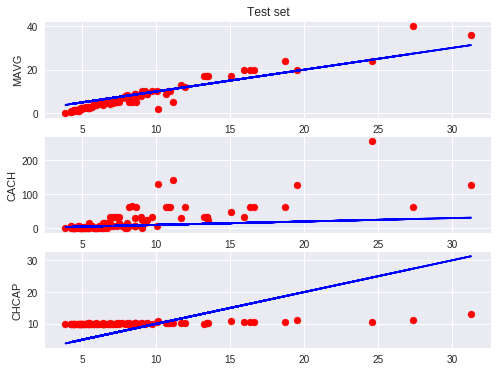

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

url='https://raw.githubusercontent.com/dulce-bits/dataset_RP_U1/master/machine_edited.csv'

df=pd.read_csv(url)

train,test=train_test_split(df,test_size=0.5,train_size=0.5)

import statsmodels.formula.api as smfrmla
model = smfrmla.ols("SQRPERF ~ MAVG + CACH + CHCAP",train).fit()

x_test = test[['MAVG','CACH','CHCAP']]
y_test = test['SQRPERF']
f_test = model.predict(x_test)

print('Test set results')
for i in range(y_test.shape[0]):
    pre = f_test.iloc[i]
    act = y_test.iloc[i]
    print('> predicted= '+ str(pre) + ', actual= '+ str(act))

import matplotlib.pyplot as plt

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.subplot(3,1,1)
plt.scatter(y_test,x_test[['MAVG']], color='r')
plt.plot(y_test, f_test, color='b')
plt.title('Test set')
plt.ylabel('MAVG')

plt.subplot(3,1,2)
plt.scatter(y_test,x_test[['CACH']], color='r')
plt.plot(y_test, f_test, color='b')
plt.ylabel('CACH')

plt.subplot(3,1,3)
plt.scatter(y_test,x_test[['CHCAP']], color='r')
plt.plot(y_test, f_test, color='b')
plt.ylabel('CHCAP')

plt.show()

# Regresión KNN

El método de regresión KNN es uno de los métodos no parámetricos más simples y populares en problemas de regresión. Es muy similar al método KNN para clasificación, con algunas diferencias al tomar la decisión, ya que de la manera convencional la predicción se calcula en base a los votos de los vecinos más pŕoximos dados un valor K, y el resultado es un valor cualitativo (una clase o categoria), en problemas de regresión se calcula de la siguiente manera, teniendo como resultado un valor cuantitativo:

$\ Predicción = \dfrac {Vecino0_{SQRPERF} +  . . .  + VecinoK_{SQRPERF}}{K}$

A continuación se presenta la implementación de regresión KNN para un valor de K=3 para el conjunto de datos Computer Hardware

> predicted=12.666029426087443, actual=14.106735979665885
> predicted=14.271073938244761, actual=15.905973720586864
> predicted=14.271073938244761, actual=15.905973720586864
> predicted=17.389783341650368, actual=19.519221295943137
> predicted=17.389783341650368, actual=19.519221295943137
> predicted=17.389783341650368, actual=27.367864366808014
> predicted=27.04427487012136, actual=35.18522417151837
> predicted=5.026979298515132, actual=4.898979485566356
> predicted=4.202795666618743, actual=3.8729833462074175
> predicted=4.508949201651666, actual=4.69041575982343
> predicted=6.079423248493426, actual=5.916079783099617
> predicted=6.291242997698602, actual=6.2449979983983965
> predicted=5.0269792985151325, actual=5.196152422706632
> predicted=13.59328464990473, actual=10.099504938362076
> predicted=8.830289695680316, actual=8.602325267042627
> predicted=11.841557048330431, actual=11.6619037896906
> predicted=5.475194148891074, actual=5.385164807134505
> predicted=5.475194148891074, ac

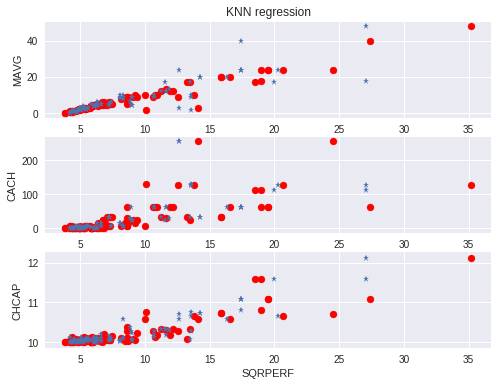

In [0]:
import pandas as pd
import random

def load_and_split_dataset(filename, approx_training_perc = 0.6):
    # lee el conjunto de datos Iris en un dataframe
    df = pd.read_csv(filename, header=None)
    # convierte el dataframe en una lista de listas
    l = df.values.tolist()
    # separa, aleatoriamente, un conjunto de instancias como el conjunto entrenamiento
    # y el resto, será un conjunto de pruebas
    training_set = []
    test_set = []
    for instance in l:
        if random.random() < approx_training_perc:
            training_set.append(instance)
        else:
            test_set.append(instance)
    return (training_set, test_set)

# funcion que calcula la distancia euclidiana entre dos instancias
import math
def euclidian_distance(instance1, instance2):
    dist = 0
    features=[5,10,11]
    for x in features:
        dist += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(dist)

# obtiene los K vecinos mas cercanos
def get_neighbors(training_set, test_instance, k):
    distances = []
    for training_instance in training_set:
        dist = euclidian_distance(test_instance, training_instance)
        distances.append((dist, training_instance))
    distances.sort()
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][1])
    return neighbors

# toma la decision con base al vecindario
import operator
def take_decision(neighbors):
    total=0
    for neighbor in neighbors:
        total+=neighbor[-1]
    return total/len(neighbors)

def get_accuracy(test_set, predictions):
    from scipy.stats import sem
    res = sem([[test_set],[predictions]])
    return res[0][0]


url='https://raw.githubusercontent.com/dulce-bits/dataset_RP_U1/master/machine_edited2.csv'
# lee conjunto de datos 
(training_set, test_set) = load_and_split_dataset(url, .5)


# genera predicciones
predictions=[]
k = 3
for instance in test_set:
    neighbors = get_neighbors(training_set, instance, k)
    result = take_decision(neighbors)
    predictions.append(result)
    print('> predicted=' + str(result) + ', actual=' + str(instance[-1]))

import matplotlib.pyplot as plt
plt.figure(1, figsize=(8, 6)) # una figura con tamaño de 8 x 6
plt.clf() # clear figure

labels=['vendor','model','MCYT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP','MAVG','CHCAP','SQRPERF']
test = pd.DataFrame(test_set, columns=labels)
x_test = test[['MAVG','CACH','CHCAP']]
y_test = test['SQRPERF']
f_test = pd.Series(predictions)

plt.subplot(3,1,1)
plt.scatter(y_test, x_test[['MAVG']], color='r')
plt.plot(f_test,x_test[['MAVG']],'*')
plt.ylabel('MAVG')
plt.title('KNN regression')

plt.subplot(3,1,2)
plt.scatter(y_test, x_test[['CACH']], color='r')
plt.plot(f_test, x_test[['CACH']],'*')
plt.ylabel('CACH')

plt.subplot(3,1,3)
plt.scatter(y_test, x_test[['CHCAP']], color='r')
plt.plot(f_test, x_test[['CHCAP']],'*')
plt.ylabel('CHCAP')
plt.xlabel('SQRPERF')

plt.show()

Se puede observar que el modelo se adapta de una manera aceptable al conjunto de pruebas, con un error bastante bajo entre la predicción y el valor real, con excepción de algunos outliers, dado que los vecinos de estos son muy lejanos el error en la estimación aumenta.

# Conclusiones
En conclusión, ambos modelos se adaptan de una manera eficiente al conjunto de datos, cada uno con sus pros y sus contras. Para la regresión lineal multiple, al ser una función de cuatro dimesiones, no se adapta a los datos en todos lo ejes de este. Y en la regresión KNN, depende mucho de sus vecinos, si estos son muy lejanos la predicción es menos confiable, e igual que en la regresión lineal multiple, se presentan dificultades debido a que es un problema multidimensional. Al comparar los resultados se concluye que la regresión lineal múltiple es el mejor approach para este conjunto de datos, tanto porque sus estimaciones parecen ser más próxima s las reales, como por su simplicidad dado que el modelo resultante es una función lineal.